In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.model_selection import train_test_split

In [2]:
#Reading the csv files. Keeping the original data and other as a copy for manipulations 
videoGameData = pd.read_csv('vgsales_cleaned.csv')
videoGameDataOriginal = pd.read_csv('vgsales_cleaned.csv')

#Just viewing the first few rows of the data
print("\t\t\tFirst few rows of the data")
print()
print(videoGameData.head())
print()

			First few rows of the data

  Platform  Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      Wii  2006        Sports  Nintendo     41.49     29.02      3.77   
1      NES  1985      Platform  Nintendo     29.08      3.58      6.81   
2      Wii  2008        Racing  Nintendo     15.85     12.88      3.79   
3      Wii  2009        Sports  Nintendo     15.75     11.01      3.28   
4       GB  1996  Role-Playing  Nintendo     11.27      8.89     10.22   

   Other_Sales  Global_Sales  
0         8.46         82.74  
1         0.77         40.24  
2         3.31         35.82  
3         2.96         33.00  
4         1.00         31.37  



In [3]:
#Just see the statistical data to see the overall mean, median, std, min, max for each column
#North America has the highest sale based on the mean of all continents. North America also has the highest sale as compared to
#all other continents. The lowest sales based on mean are in other sales category. Japan has the lowest sale. All mins are zero
#because we have replaced missing values with zeros.There are a total of 16323 records for each category.
print("\t\t\tStatiscal attributes of the data")
print()
print(videoGameData.describe())
print()

			Statiscal attributes of the data

               Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16323.000000  16323.000000  16323.000000  16323.000000  16323.000000   
mean    2006.403664      0.265463      0.147591      0.078677      0.048336   
std        5.826954      0.821684      0.508823      0.311593      0.189907   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2016.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16323.000000  
mean       0.540343  
std        1.565906  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.480000  
max       82.740000  



In [4]:
#Just to see what data types are each column with the count of number of non null values
#Publisher has some null values that needs to be replaced with zeros before training the data on a classifier
print(videoGameData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16323 entries, 0 to 16322
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      16323 non-null  object 
 1   Year          16323 non-null  int64  
 2   Genre         16323 non-null  object 
 3   Publisher     16287 non-null  object 
 4   NA_Sales      16323 non-null  float64
 5   EU_Sales      16323 non-null  float64
 6   JP_Sales      16323 non-null  float64
 7   Other_Sales   16323 non-null  float64
 8   Global_Sales  16323 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.1+ MB
None


In [5]:
#With years going on, sales in NA are decreasing, EU sales are increasing, JP sales are decreasing, Other sales are increasing.
#NA sales has highly covariance with years and other sales has lowest covariance with years. NA sales has the highest contribution
#to global sales 
print(videoGameData.cov())

                   Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year          33.953392 -0.437323  0.018249 -0.307377     0.045573   
NA_Sales      -0.437323  0.675164  0.321485  0.115542     0.099010   
EU_Sales       0.018249  0.321485  0.258901  0.069190     0.070178   
JP_Sales      -0.307377  0.115542  0.069190  0.097090     0.017199   
Other_Sales    0.045573  0.099010  0.070178  0.017199     0.036065   
Global_Sales  -0.681015  1.211110  0.719697  0.298996     0.222429   

              Global_Sales  
Year             -0.681015  
NA_Sales          1.211110  
EU_Sales          0.719697  
JP_Sales          0.298996  
Other_Sales       0.222429  
Global_Sales      2.452063  


In [6]:
#With years increasing,the NA sales and JP sales are decreasing, Other sales and EU sales are increasing
#With years increasing, the overall global sales for video games are decreasing
#NA sales has the highest correlation to the global sales
#JP sales has the lowest correlaton to the global sales
print(videoGameData.corr())

                  Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year          1.000000 -0.091339  0.006155 -0.169294     0.041184   
NA_Sales     -0.091339  1.000000  0.768934  0.451281     0.634504   
EU_Sales      0.006155  0.768934  1.000000  0.436406     0.726262   
JP_Sales     -0.169294  0.451281  0.436406  1.000000     0.290645   
Other_Sales   0.041184  0.634504  0.726262  0.290645     1.000000   
Global_Sales -0.074636  0.941267  0.903270  0.612789     0.747970   

              Global_Sales  
Year             -0.074636  
NA_Sales          0.941267  
EU_Sales          0.903270  
JP_Sales          0.612789  
Other_Sales       0.747970  
Global_Sales      1.000000  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

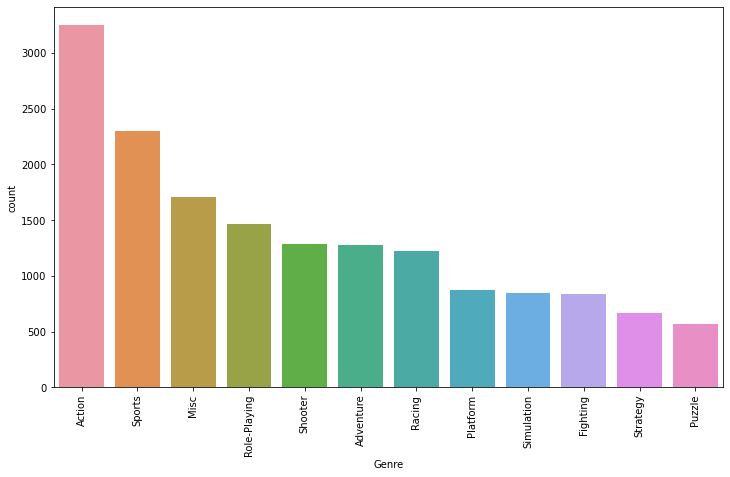

In [7]:
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.countplot(x="Genre", data=videoGameData, order = videoGameData['Genre'].value_counts().index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(35, 0, '2015'),
  Text(3

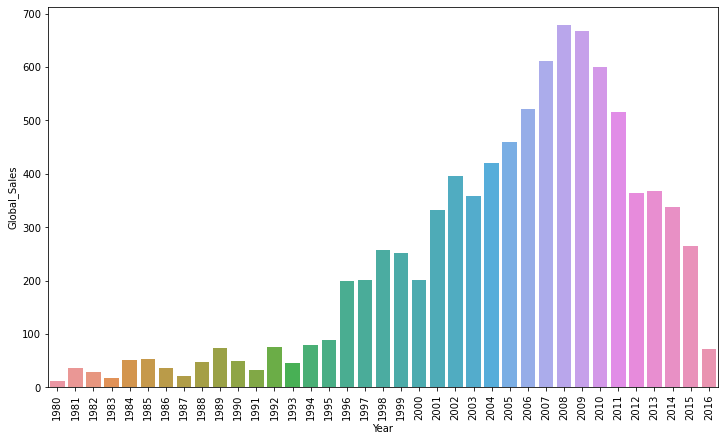

In [8]:
# Which year had the highest sales worldwide?
vgdata_year = videoGameData.groupby(by=['Year'])['Global_Sales'].sum()
vgdata_year = vgdata_year.reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(x="Year", y="Global_Sales", data=vgdata_year)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2008'),
  Text(2, 0, '2010'),
  Text(3, 0, '2007'),
  Text(4, 0, '2011'),
  Text(5, 0, '2006'),
  Text(6, 0, '2005'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2012'),
  Text(11, 0, '2015'),
  Text(12, 0, '2014'),
  Text(13, 0, '2013'),
  Text(14, 0, '2001'),
  Text(15, 0, '1998'),
  Text(16, 0, '2000'),
  Text(17, 0, '2016'),
  Text(18, 0, '1999'),
  Text(19, 0, '1997'),
  Text(20, 0, '1996'),
  Text(21, 0, '1995'),
  Text(22, 0, '1994'),
  Text(23, 0, '1993'),
  Text(24, 0, '1981'),
  Text(25, 0, '1992'),
  Text(26, 0, '1991'),
  Text(27, 0, '1982'),
  Text(28, 0, '1986'),
  Text(29, 0, '1983'),
  Text(30, 0, '1989'),
  Text(31, 0, '1987'),
  Text(32, 0, '1990'),
  Text(33, 0, '1988'),
  Text(34, 0, '1985'),
  Text(35, 0, '1984'),
  Text(3

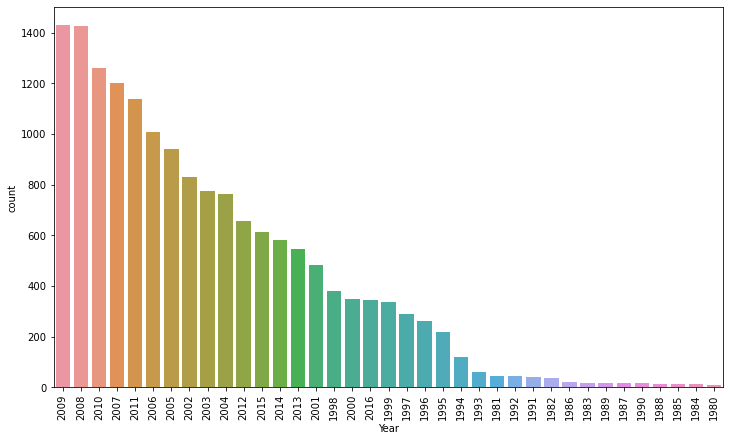

In [9]:
# Which year had the most game release?

plt.figure(figsize=(12, 7))
sns.countplot(x="Year", data=videoGameData, order = videoGameData.groupby(by=['Year'])['Publisher'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

In [10]:
#function to chnage the categorical variables to numerical
def ConvertNumericalToCategorical(columnName, videoGameData):
    #getting the categorical values of the Platform and saving it in a a list with their appropiate numerical value
    labels = videoGameData[columnName].astype('category').cat.categories.tolist()
    #creating a dictionary, saving the categorical values with their equivalent numerical numbers
    return {columnName : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [11]:
#changing the categorical variable into numerical numbers for classification later

#creating a dictionary, saving the categorical values with their equivalent numerical numbers
replace_Platform_comp = ConvertNumericalToCategorical('Platform', videoGameData)
videoGameData.replace(replace_Platform_comp, inplace=True)

#creating a dictionary, saving the categorical values with their equivalent numerical numbers
replace_Genre_comp = ConvertNumericalToCategorical('Genre', videoGameData)
videoGameData.replace(replace_Genre_comp, inplace=True)

#creating a dictionary, saving the categorical values with their equivalent numerical numbers
replace_Publisher_comp = ConvertNumericalToCategorical('Publisher', videoGameData)
videoGameData.replace(replace_Publisher_comp, inplace=True)

In [12]:
#Shuffling the data frame and dividing it in test and train data
#splitting the data into 75% train and 25% test data
videoGameData = videoGameData.sample(frac = 1)
X=videoGameData[['Platform', 'Year', 'Genre', 'Publisher']]
y=videoGameData[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
X_train, X_test = X[:12000], X[12000:]
y_train, y_test = y[:12000], y[12000:]

In [13]:
#This function will change the numerical data back to categorical
def ConvertNumericalToCategorical(dictionary, column):
    tempDict={}
    for key,value in dictionary[column].items():
        tempDict[value]=key
    return {column:tempDict}

In [14]:
def DrawHistogram(columnName, videoGameOriginalData,X_train,X_test,tempX_train,tempX_test):
   
    #Histogram for entire data
    fig = plt.figure(figsize = (20,10))
    ax = fig.gca()
    if(columnName == 'Year'):
        videoGameOriginalData[columnName].hist(ax=ax,bins=7)
    else:
        videoGameDataOriginal[columnName].hist(ax = ax)
    plt.title('All', fontsize=15)
    plt.tight_layout()
    plt.xlabel(columnName, fontsize=15)
    plt.ylabel('Number of games', fontsize=15)
    
    #Histogram for train data
    fig = plt.figure(figsize = (20,10))
    ax = fig.gca()
    if(columnName == 'Year'):
        X_train[columnName].hist(ax=ax,bins=7)
    else:
        tempX_train[columnName].hist(ax = ax)
    plt.title('Train', fontsize=15)
    plt.tight_layout()
    plt.xlabel(columnName, fontsize=15)
    plt.ylabel('Number of games', fontsize=15)
    
    #Histogram for test data
    fig = plt.figure(figsize = (20,10))
    ax = fig.gca()
    if(columnName == 'Year'):
        X_test[columnName].hist(ax=ax,bins=7)
    else:
        tempX_test[columnName].hist(ax = ax)
    plt.title('Test', fontsize=15)
    plt.tight_layout()
    plt.xlabel(columnName, fontsize=15)
    plt.ylabel('Number of games', fontsize=15)

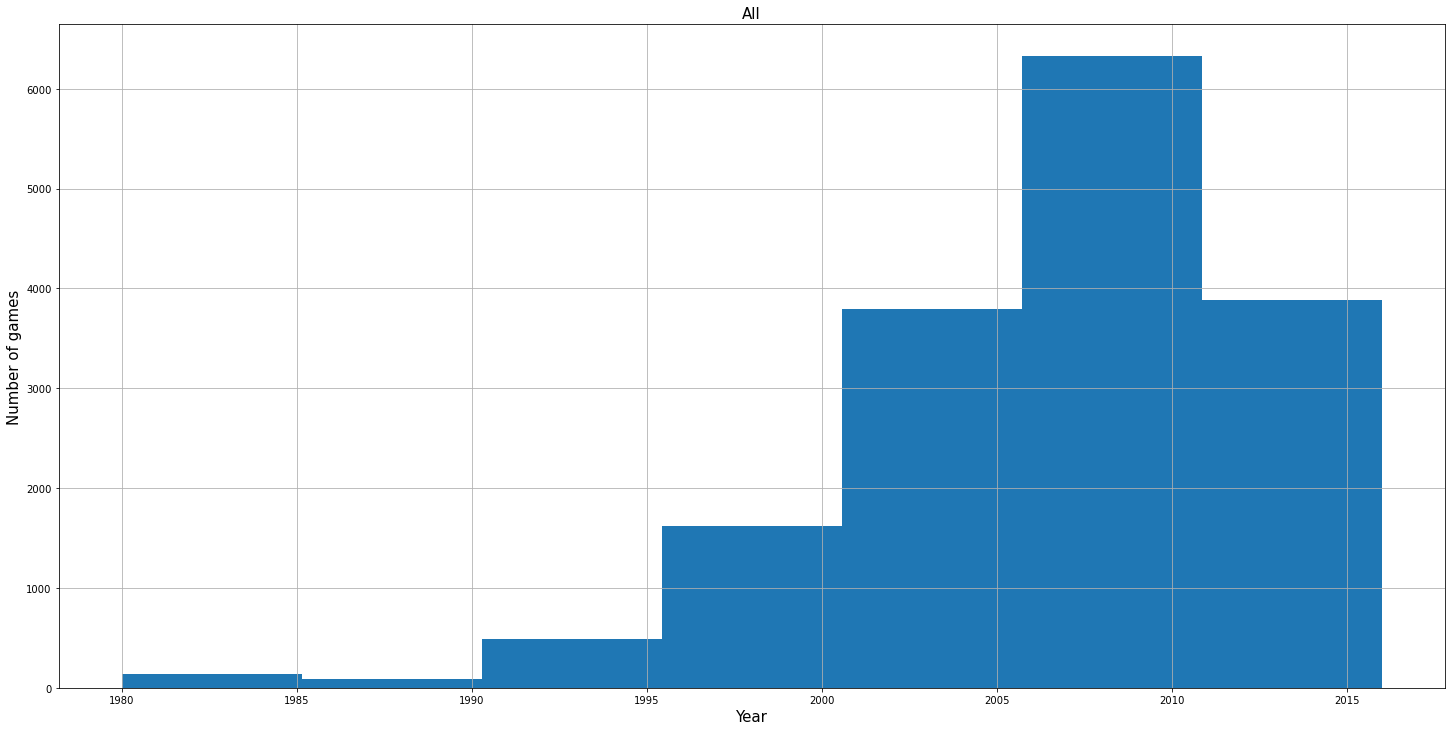

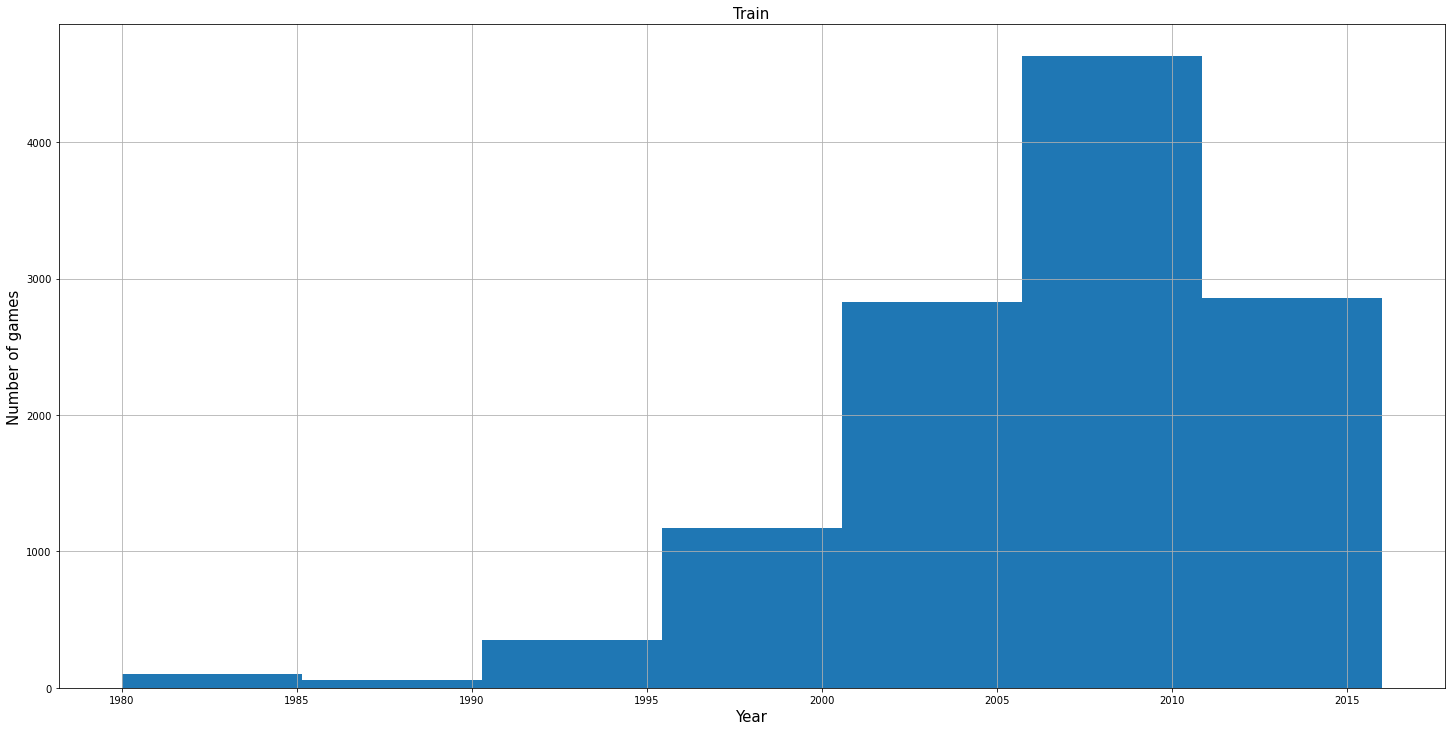

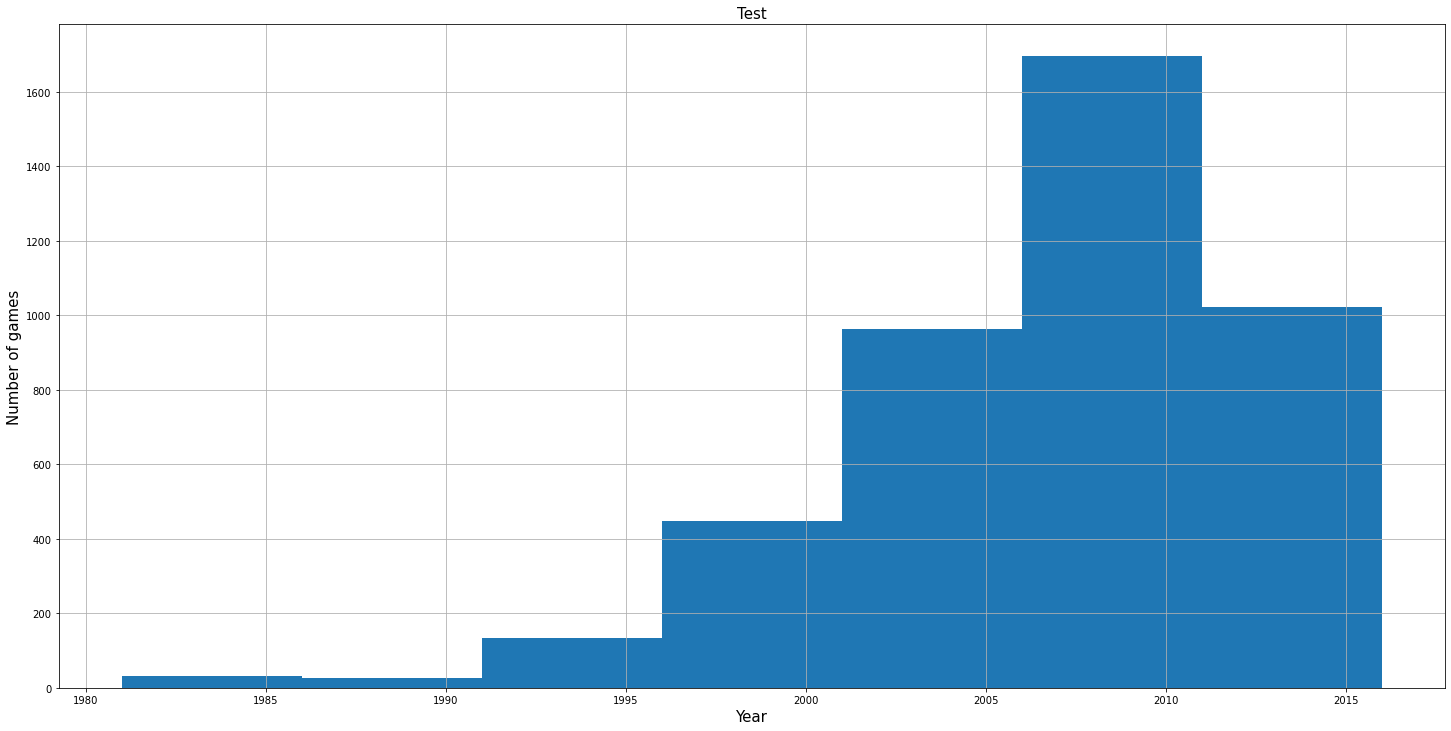

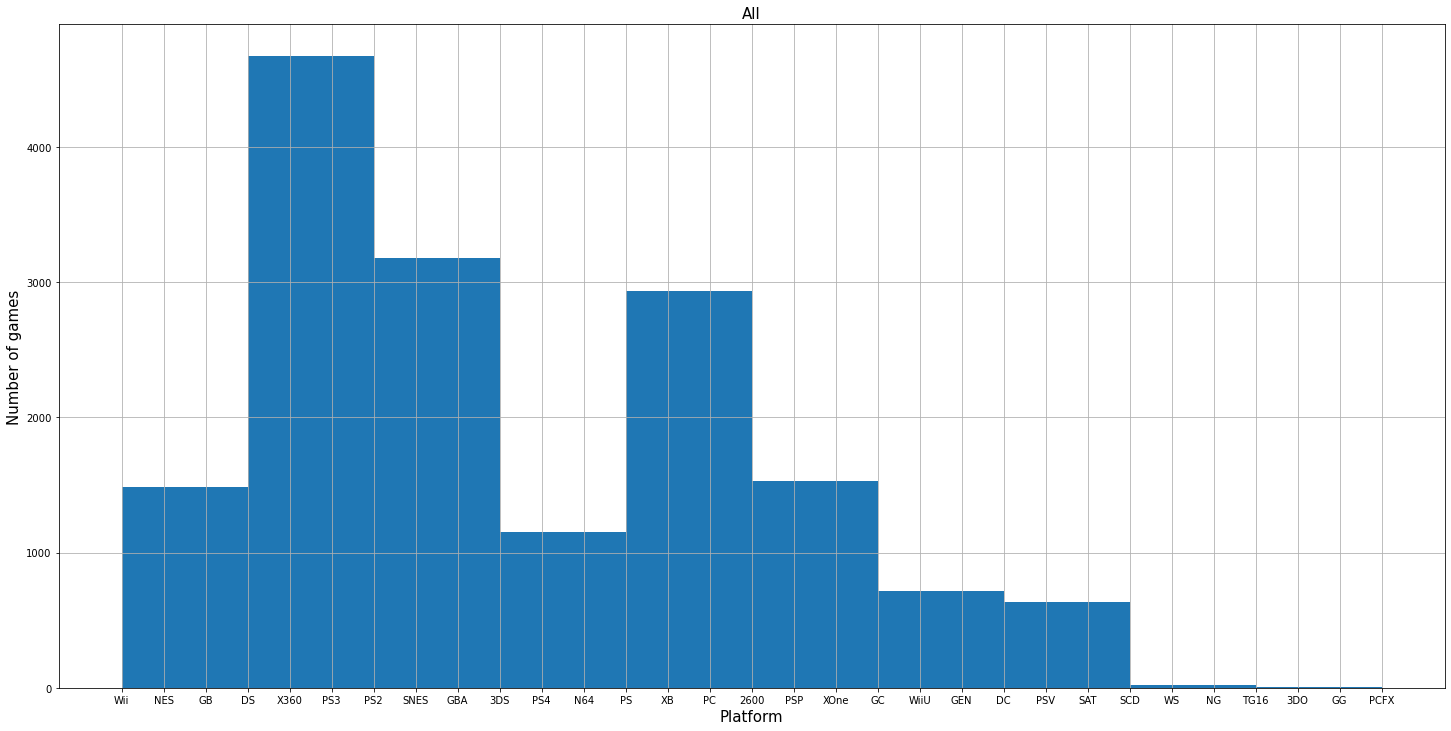

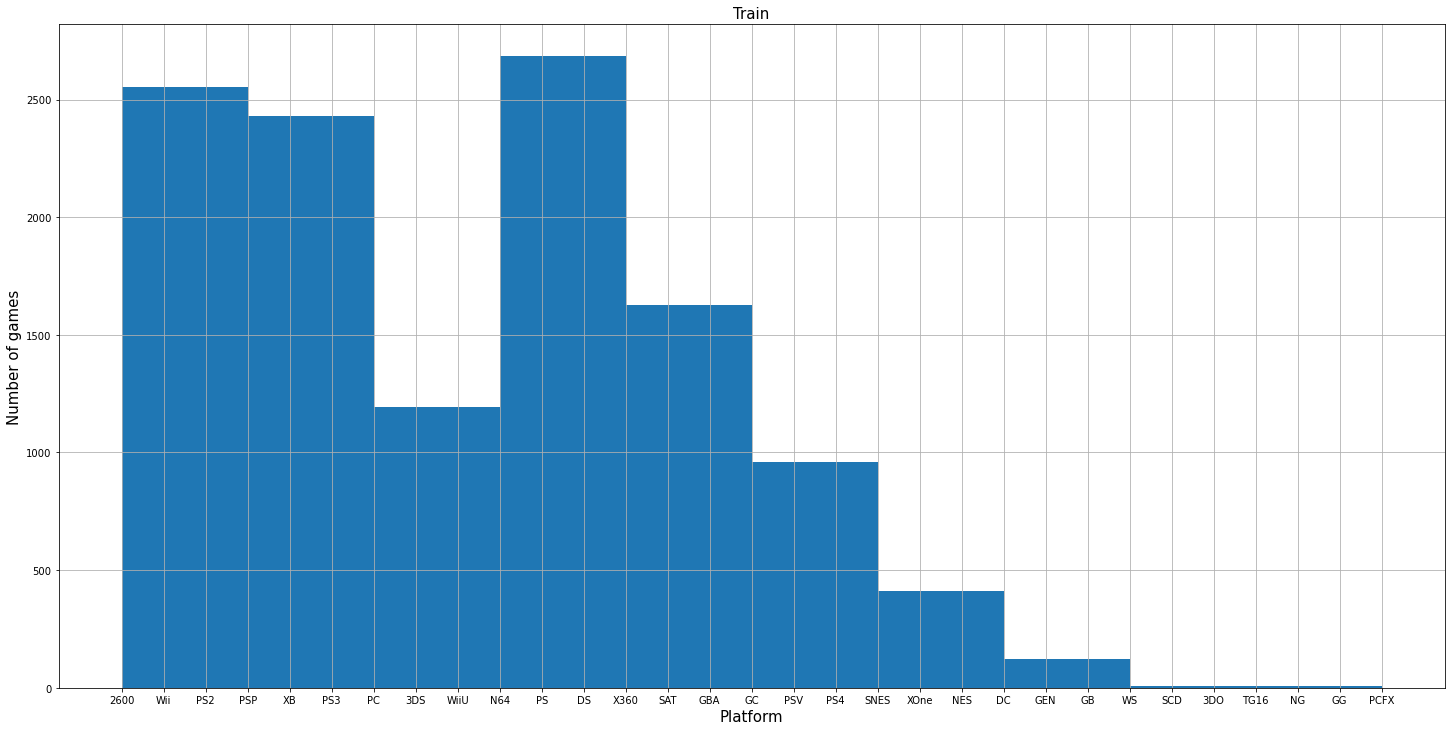

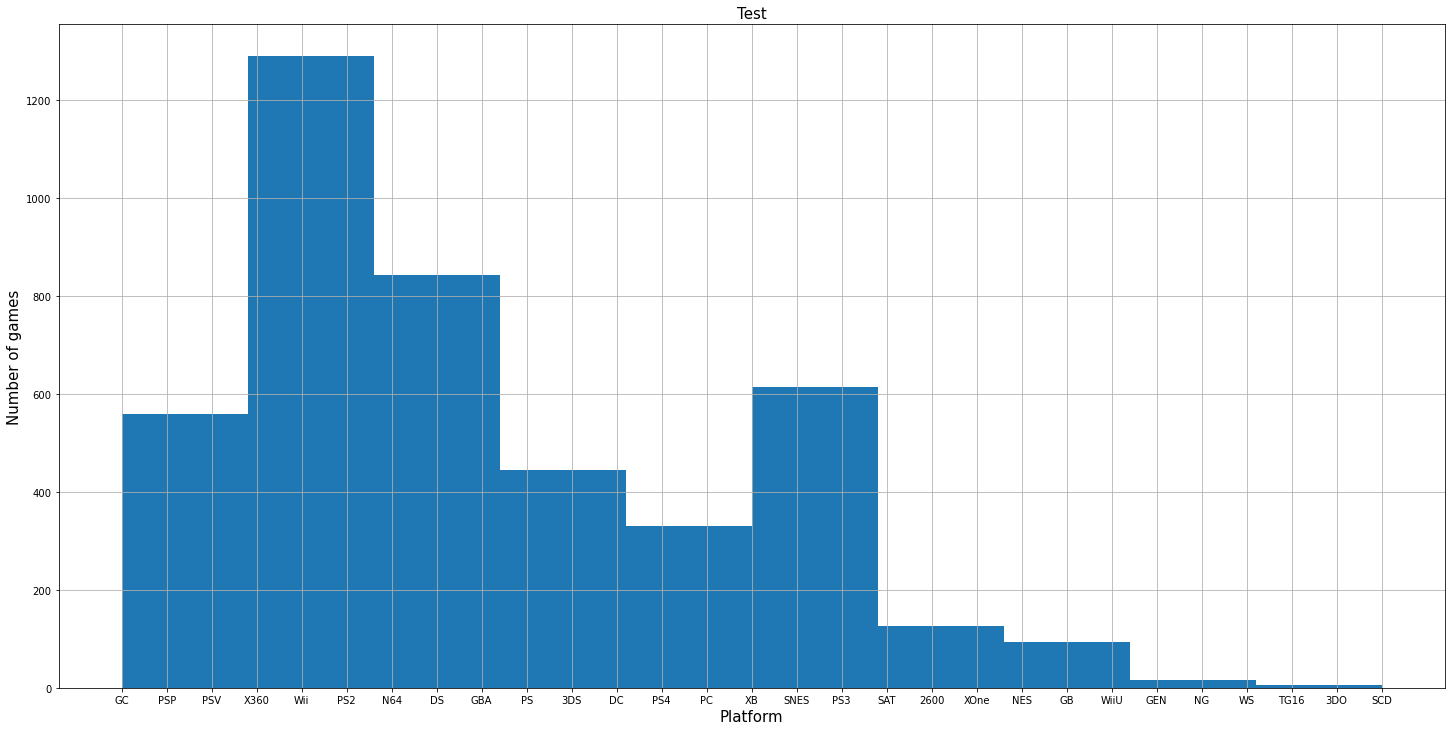

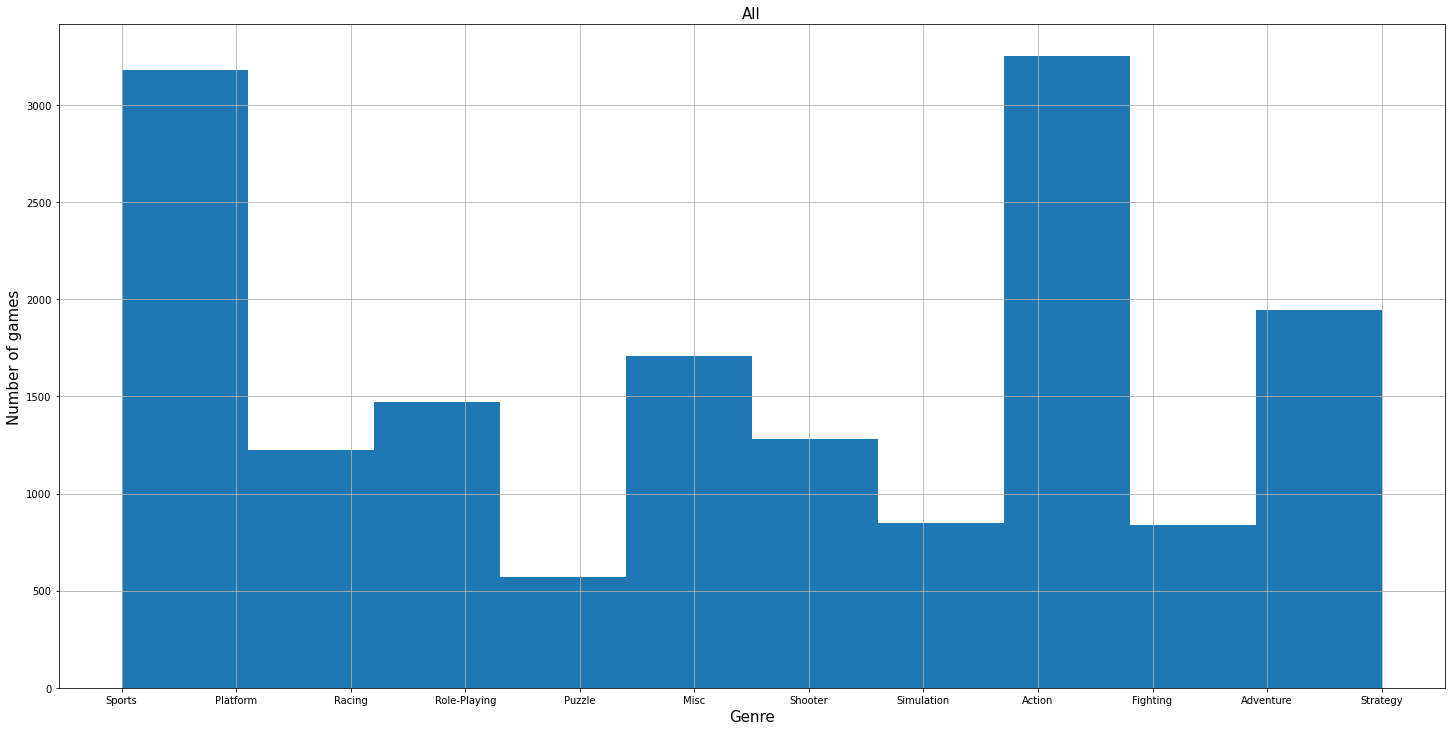

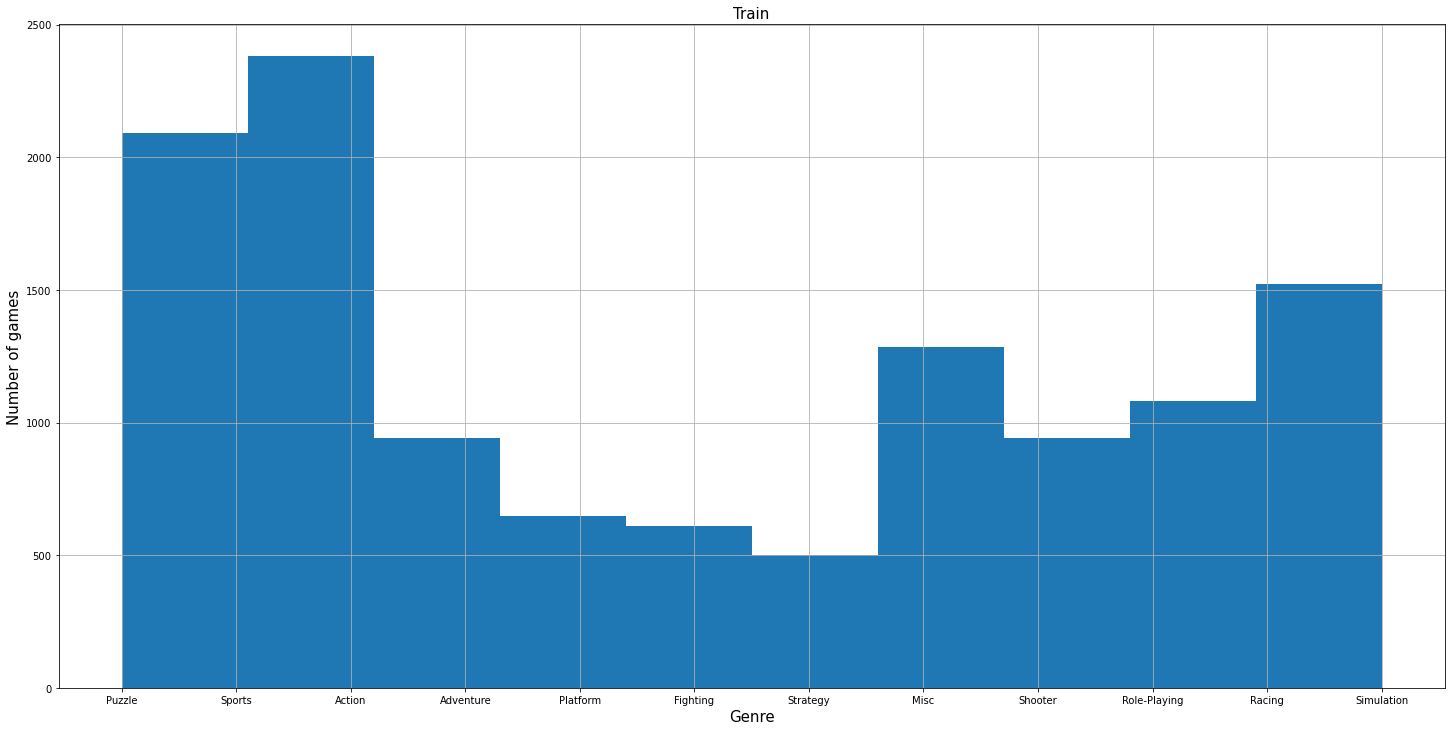

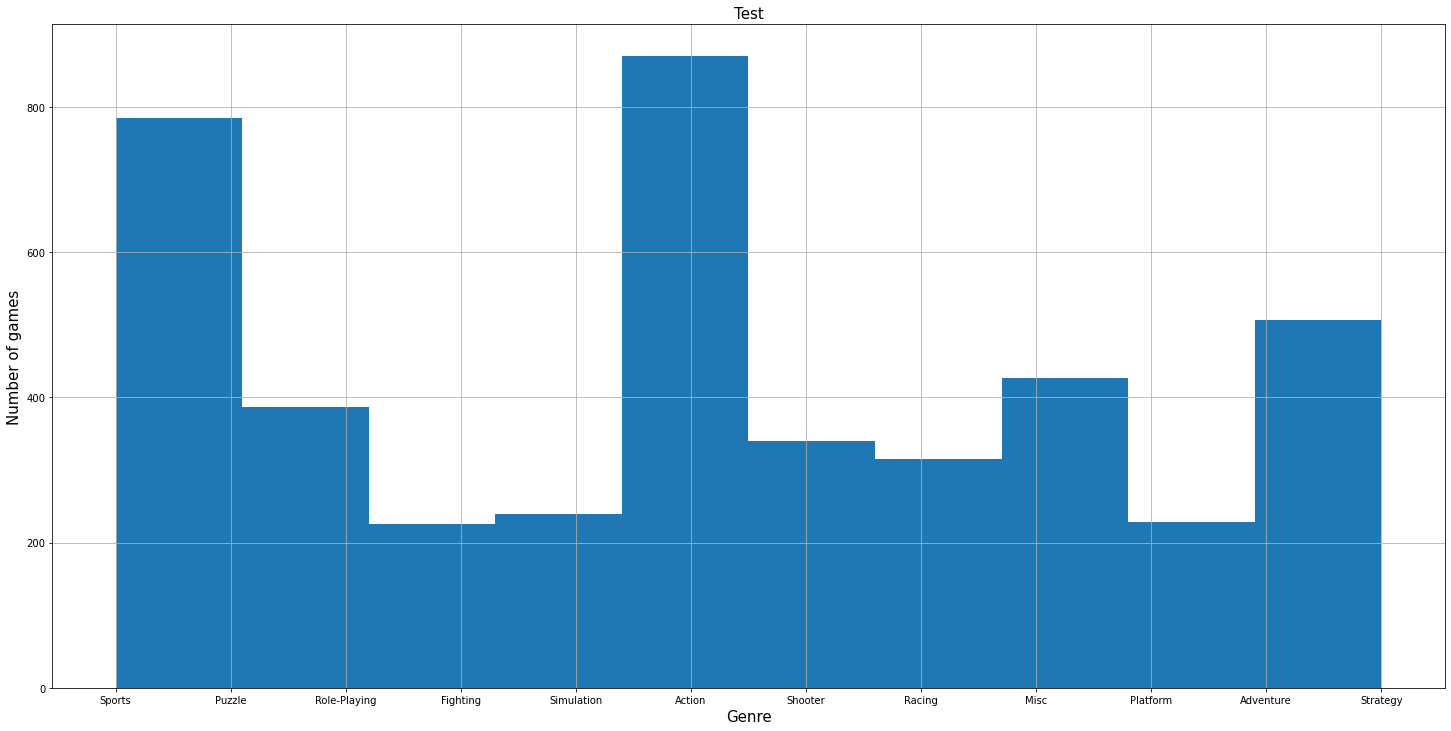

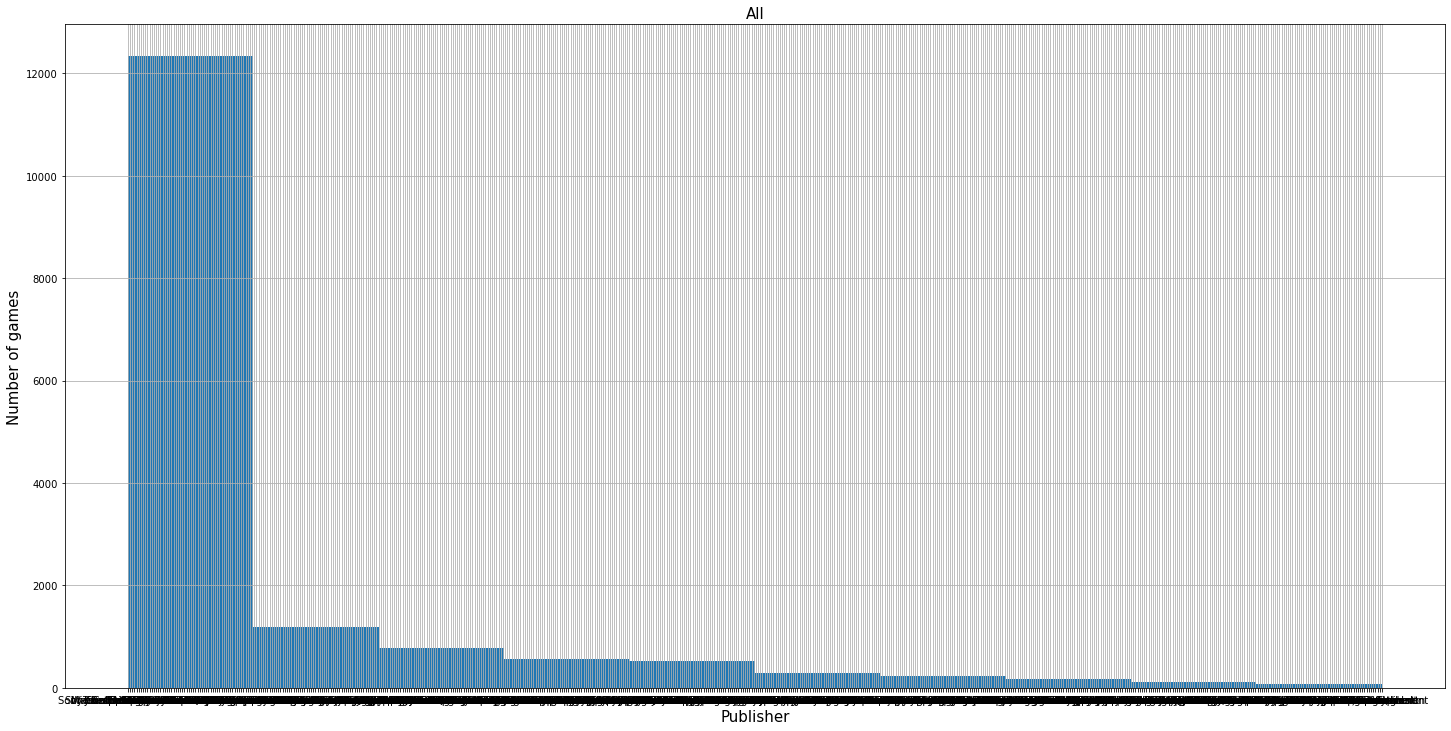

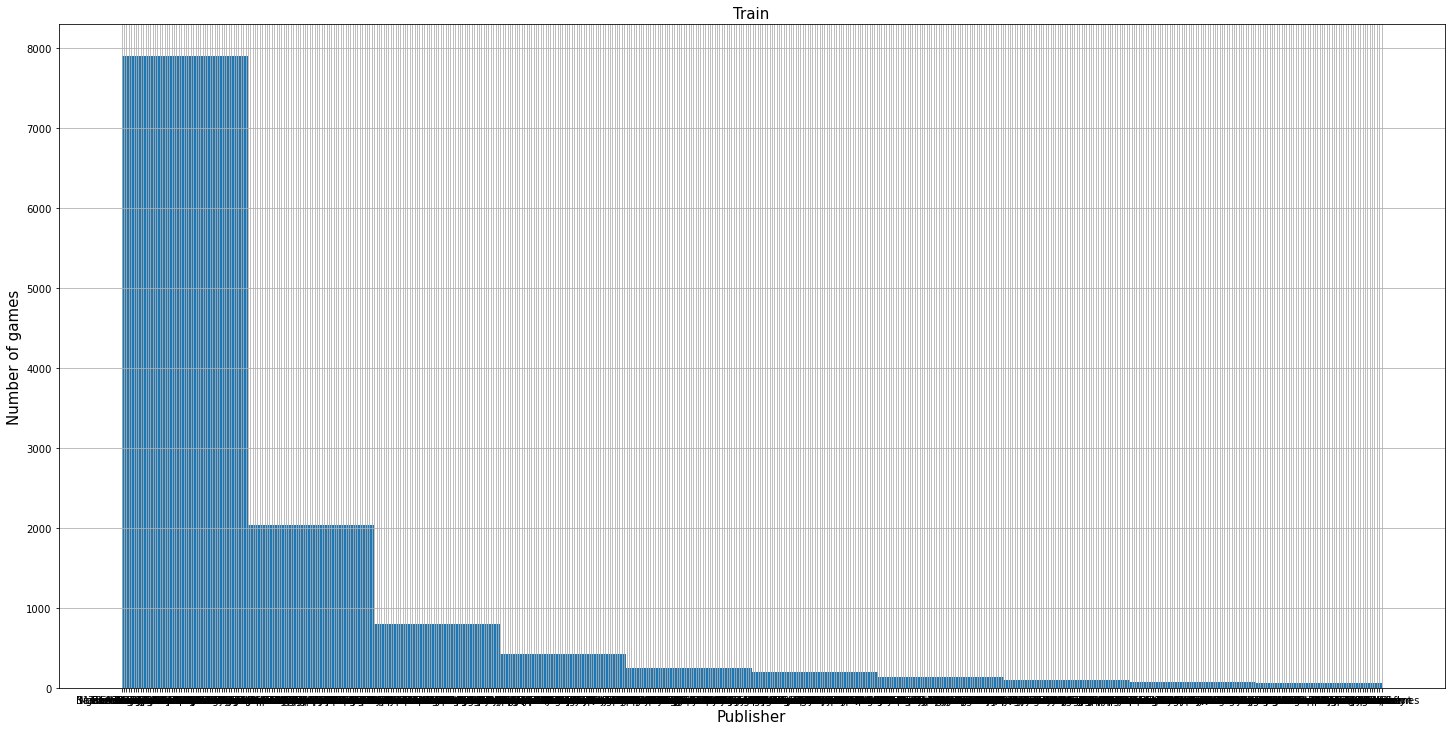

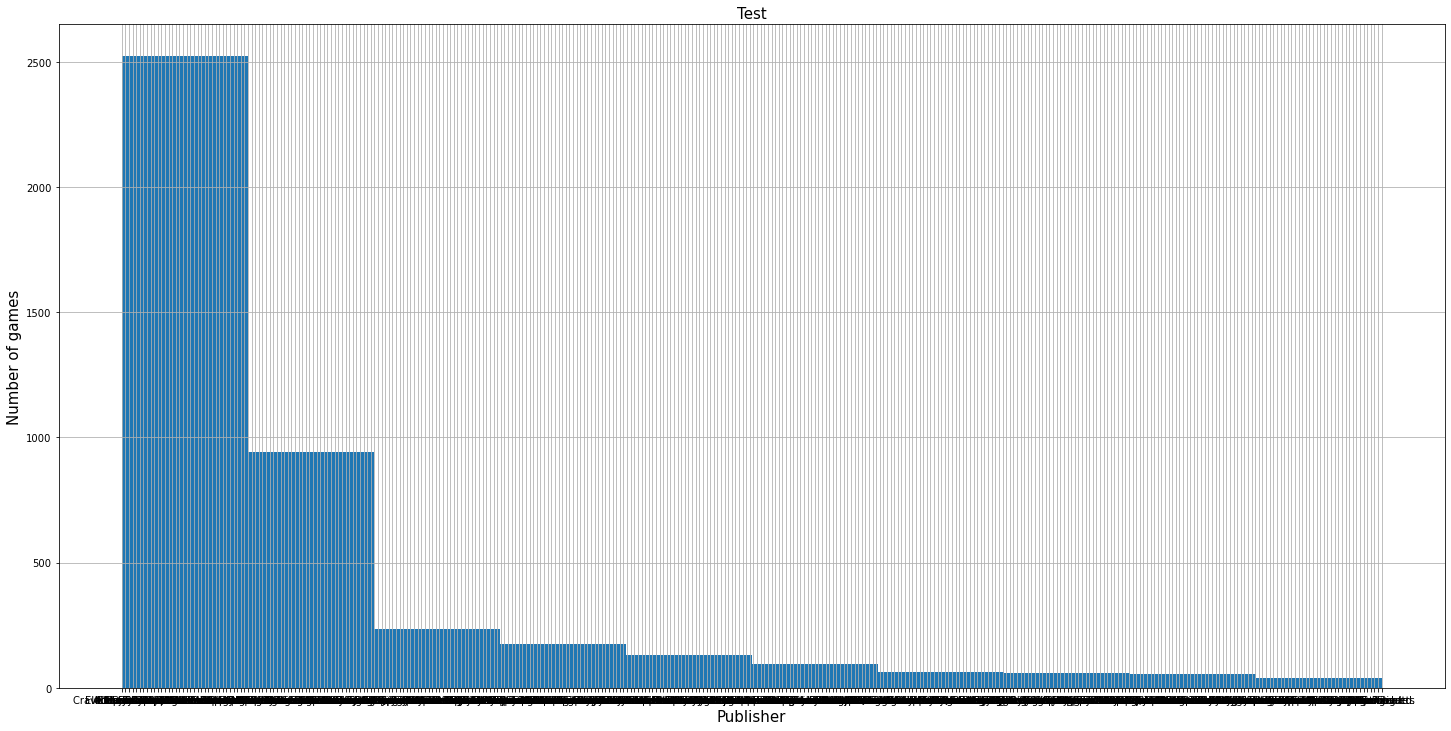

In [15]:
#No bin count because we have float data and we may lose important information
"""Class Distribution in Random Subsampling"""
#Creating a copy of training and testing data
tempX_train=X_train.copy()
tempX_test=X_test.copy()

#Need to change train and test data back to categorical variables to see the histograms
replace_Platform_num=ConvertNumericalToCategorical(replace_Platform_comp,"Platform")
tempX_train.replace(replace_Platform_num,inplace=True)
tempX_test.replace(replace_Platform_num,inplace=True)

#Need to change train and test data back to categorical variables to see the histograms
replace_Genre_num=ConvertNumericalToCategorical(replace_Genre_comp,"Genre")
tempX_train.replace(replace_Genre_num,inplace=True)
tempX_test.replace(replace_Genre_num,inplace=True)

#Need to change train and test data back to categorical variables to see the histograms
replace_Publisher_num=ConvertNumericalToCategorical(replace_Publisher_comp,"Publisher")
tempX_train.replace(replace_Publisher_num,inplace=True)
tempX_test.replace(replace_Publisher_num,inplace=True)

#This is the plot for year vs number of games for All,test,train data
DrawHistogram('Year', videoGameDataOriginal,X_train,X_test,tempX_train,tempX_test)
#This is the plot for platform vs number of games for All,test,train data
DrawHistogram('Platform', videoGameDataOriginal,X_train,X_test,tempX_train,tempX_test)
#This is the plot for Genre vs number of games for All,test,train data
DrawHistogram('Genre', videoGameDataOriginal,X_train,X_test,tempX_train,tempX_test)
#This is the plot for publisher vs number of games for All,test,train data
DrawHistogram('Publisher', videoGameDataOriginal,X_train,X_test,tempX_train,tempX_test)

In [16]:
#Histogram Year for all,test,and train data
"""The histogram for all year data is skewed left and the data is over range of year 1980 to 2016. There are more than 6000 
games released between 2006 and 2011. The test and train data has similiar histogram as entire data set for years. They are
also skewed left which shows that more games were released after 2005"""

#Histogram Platform for all, test, and train data
"""The histogram is right skewed for all, test and train data.The skewness does not give any useful information for the
platforms. For the all data, most of the games were released on platform PS2,X360,PS3,and DS. For the train data, most of
the games were released on Wii,PSP, and DS.For the test data, most of the games were released onXB,DS, and PS2"""

#Histogram for Genre for all,test, and train data
"""The histogram is Bimodal for all, test and train data.For the all data, most games were released with Genre action and sport.
For train data, most games were released with Genre Misc and then action. For test data, most games were released with Genre
Action and Simulation. We can see action in test,train, and all data. Overall, we see that all genres had near about equal 
distribution for number of games released for different platforms.
"""

#Histogram for Publisher for all,test, and train data
"""The histograms for all,test,and train data are all right skewed. There are alot of publishers therefore the histogram is 
not really useful for intrepretation of the dataset. There is no useful information that we can find in the publisher
histogram. A different view of the dataset for publisher will be a better model to intrepret the information
"""

'\nThe histograms for all,test,and train data are all right skewed. There are alot of publishers therefore the histogram is \nnot really useful for intrepretation of the dataset. There is no useful information that we can find in the publisher\nhistogram. A different view of the dataset for publisher will be a better model to intrepret the information'

In [17]:
#Calculating mean of all the columns
meanOfNA_Sales = videoGameData.loc[:,"NA_Sales"].mean(axis=0)
meanOfEU_Sales = videoGameData.loc[:,"EU_Sales"].mean(axis=0)
meanOfJP_Sales = videoGameData.loc[:,"JP_Sales"].mean(axis=0)
meanOfOther_Sales = videoGameData.loc[:,"Other_Sales"].mean(axis=0)

In [18]:
#if the sales value is less than the mean of the the column sales then replace it with false else replace with true
videoGameData['NA_Sales'] = np.where(videoGameData['NA_Sales'] >= meanOfNA_Sales, True, False)
videoGameData['EU_Sales'] = np.where(videoGameData['EU_Sales'] >= meanOfEU_Sales, True, False)
videoGameData['JP_Sales'] = np.where(videoGameData['JP_Sales'] >= meanOfJP_Sales, True, False)
videoGameData['Other_Sales'] = np.where(videoGameData['Other_Sales'] >= meanOfOther_Sales, True, False)

In [19]:
#Pessimistic Bias in Holdout

#replacing null values with zeros
videoGameData["Publisher"]=videoGameData["Publisher"].fillna(0)
#spliting the independent and target columns. Spliting the data set into test and train data
X2 = videoGameData[['Platform', 'Year', 'Genre', 'Publisher']]
y2 = videoGameData[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
#spliting the testing and training data in half
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size=0.5,random_state=12)
#printing the size of the testing and training data
print('Number of train examples:', y_train2.shape[0])
print('Number of test examples:', y_test2.shape[0])
print('Labels:', y_train2)

Number of train examples: 8161
Number of test examples: 8162
Labels:        NA_Sales  EU_Sales  JP_Sales  Other_Sales
975        True      True      True         True
16261     False     False     False        False
10437     False     False     False        False
4497      False      True     False         True
10911     False     False      True        False
...         ...       ...       ...          ...
13597     False     False     False        False
15675     False     False     False        False
2280       True      True     False         True
9578      False     False     False        False
4419      False     False      True        False

[8161 rows x 4 columns]


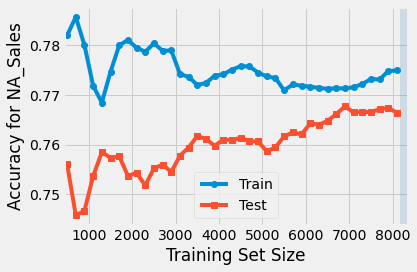

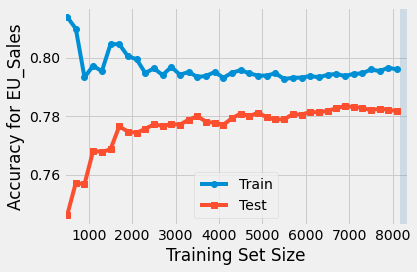

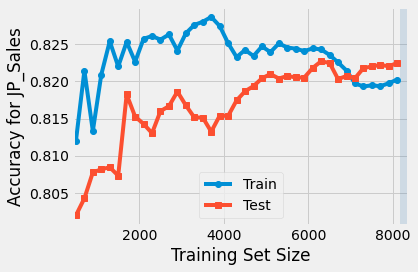

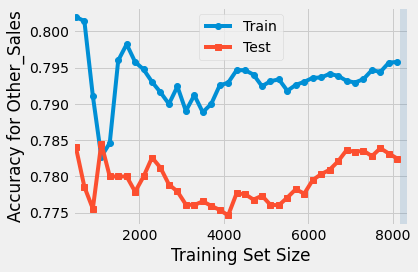

<Figure size 432x288 with 0 Axes>

In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
#Find the logistic regression for each target variable (4 sales)
for col in columns:
    clf_2 = LogisticRegression(penalty='l2',
    dual=False,
    tol=0.0001,
    C=0.000001,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=12,
    solver='lbfgs',
    max_iter=1000,
    multi_class='multinomial',
    verbose=0,
    warm_start=False,
    n_jobs=1)
    
    pred_train, pred_test = [], []
    intervals = np.arange(500, X_train2.shape[0] + 1, 200)
    #training and testing the model on the data for each target.Saving the accuracy scores
    for i in intervals:
        clf_2.fit(X_train2[:i], y_train2[col][:i])
        p_train = clf_2.score(X_train2[:i], y_train2[col][:i])     
        p_test = clf_2.score(X_test2[:i], y_test2[col][:i])
        pred_train.append(p_train)
        pred_test.append(p_test)
    #plotting the data size (test and train) vs accuracy scores
    with plt.style.context(('fivethirtyeight')):
        plt.plot(intervals, pred_train, marker='o', label='Train')
        plt.plot(intervals, pred_test, marker='s', label='Test')
        plt.legend(loc='best', numpoints=1)
        plt.xlim([430, X_train2.shape[0]+200])
        plt.axvspan(X_train2.shape[0],
        X_train2.shape[0] + X_test2.shape[0],
        alpha=0.2,
        color='steelblue')
        plt.xlabel('Training Set Size')
        ylabel="Accuracy for " + col
        plt.ylabel(ylabel)
        plt.tight_layout()
        plt.show() 
        plt.clf()

In [ ]:
#Logistic Regression
#Accuracy for NA_Sales test and train data
"""As the training and testing data size increases, the overall accuracy of the model increases too. At the start with smallest
data set, model has the highest accuracy for predicting the NA_Sales of training dataset. At train and test data size of 7000,
the model has the optimal accuracy (around 0.77) as after that the model may overfit the training data, eventually leading to 
lower test data accuracy and high train data accuracy. Using logistic regression, we are taking year, publisher, platform, and genre to
predict if a game will make enough sales to be classified successful in NA. Class is true -> Make good sales(successful),
false-> make bad sales (unsuccessful)"""

#Accuracy for EU_Sales test and train data
"""As the training and testing data size increases, the overall accuracy of the model increases too. At the start with smallest
data set, model has the highest accuracy for predicting the EU_Sales of training dataset. After certain data size, the
model accuracy levels are stable  and it shows that the model has reached it's optimal accuracy between 0.77 and 0.80 for
both train and test data. Using logistic regression, we are taking year, publisher, platform, and genre to
predict if a game will make enough sales to be classified successful in EU. Class is true -> Make good sales(successful),
false-> make bad sales (unsuccessful)"""

#Accuracy for JP_Sales test and train data
"""As the training and testing data size increases, the overall accuracy of the model increases too. At the start with smallest
data set, model has the highest accuracy for predicting the EU_Sales of training dataset. After data size of 4000, the
model accuracy levels for test data are increasing while decreasing for training data. The accuracy level are between 0.820 and
0.825 for the model for train and test data.Using logistic regression, we are taking year, publisher, platform, and genre to
predict if a game will make enough sales to be classified successful in JP. Class is true -> Make good sales(successful),
false-> make bad sales (unsuccessful)"""

#Accuracy for Other_Sales test and train data
"""As the training and testing data size increases, the overall accuracy of the model increases too. The model has higher 
accuracy for training data as compared to test data which shows that the model may be vulnerable to overfitting. The train data
has an overall accuracy of 0.795 and test data has an overall accuracy of 0.785.
Using logistic regression, we are taking year, publisher, platform, and genre to predict if a game will make enough sales to be 
classified successful in other continent. Class is true -> Make good sales(successful),false-> make bad sales (unsuccessful)"""


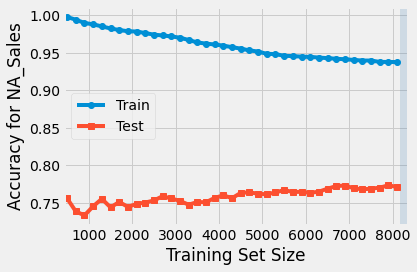

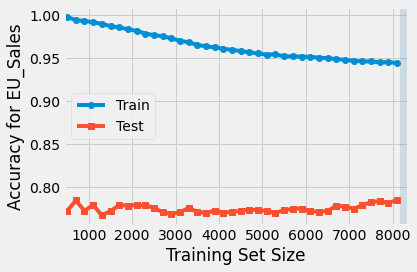

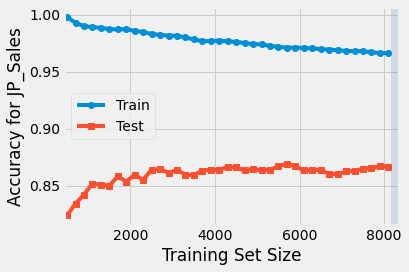

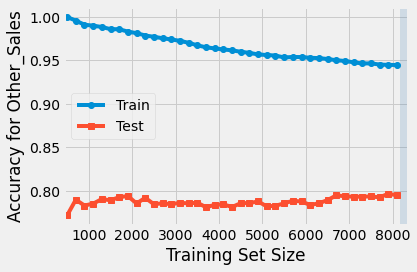

<Figure size 432x288 with 0 Axes>

In [21]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Find the RandomForestClassifier for each target variable (4 sales)
columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for col in columns:
    clf_2 = RandomForestClassifier(n_estimators=100, random_state=123)
    pred_train, pred_test = [], []
    intervals = np.arange(500, X_train2.shape[0] + 1, 200)
    #training and testing the model on the data for each target.Saving the accuracy scores
    for i in intervals:
        clf_2.fit(X_train2[:i], y_train2[col][:i])
        p_train = clf_2.score(X_train2[:i], y_train2[col][:i])     
        p_test = clf_2.score(X_test2[:i], y_test2[col][:i])
        pred_train.append(p_train)
        pred_test.append(p_test)
    #plotting the data size (test and train) vs accuracy scores
    with plt.style.context(('fivethirtyeight')):
        plt.plot(intervals, pred_train, marker='o', label='Train')
        plt.plot(intervals, pred_test, marker='s', label='Test')
        plt.legend(loc='best', numpoints=1)
        plt.xlim([430, X_train2.shape[0]+200])
        plt.axvspan(X_train2.shape[0],
        X_train2.shape[0] + X_test2.shape[0],
        alpha=0.2,
        color='steelblue')
        plt.xlabel('Training Set Size')
        ylabel="Accuracy for " + col
        plt.ylabel(ylabel)
        plt.tight_layout()
        plt.show() 
        plt.clf()


In [ ]:
#Random Forest Classifier 
#Accuracy for NA_Sales test and train data
"""As the training data size increases, the accuracy of this model decreases. However, as the test data size increases, the 
accuracy of the model increases. The overall increase in accuracy is not significant for the test data and the accuracy is 
between 0.75 and 0.80.The overall decrease in accuracy of the training data is stable too and the accuracy is around 0.95.
This model has better accuracy for both train and test data as compared to logistic regression. Thus, it's better to predict
whether a game will be successful in sales in NA.Using Random Forest Classifier, we are taking year, publisher, platform, and 
genre to predict if a game will make enough sales to be classified successful in NA. Class is true -> Make good sales
(successful), false-> make bad sales (unsuccessful)"""

#Accuracy for EU_Sales test and train data
"""As the training data size increases, the accuracy of this model decreases. The test data accuracy is overall stable as the
data size increases. The test data has overall accuracy less than 0.80 and the train data has overall accuracy of 0.95. The 
model has better accuracy for train data set as compared to logistic regression model. For the test data, both models have 
almost same accuracy for predicting EU sales. Thus, overall this model is better than logistic regression. Using Random Forest 
Classifier, we are taking year, publisher, platform, and genre to predict if a game will make enough sales to be classified
successful in EU. Class is true -> Make good sales (successful), false-> make bad sales (unsuccessful)"""

#Accuracy for JP_Sales test and train data
"""As the training data size increases, the accuracy of this model decreases. It remains greater than 0.95 which is really high
accuracy for a training data set. However, as the test data size increases, the accuracy of the model increases. It remains
greater than 0.85 for test data.This model has better accuracy for both train and test data as compared to logistic regression. 
Thus, it's better to predict whether a game will be successful in sales in JP. Using Random Forest  Classifier, we are taking 
year, publisher, platform, and genre to predict if a game will make enough sales to be classified successful in JP. Class is 
true -> Make good sales (successful), false-> make bad sales (unsuccessful)"""

#Accuracy for Other_sales test and train data
"""As the training data size increases, the accuracy of this model decreases at a steady rate. It remains around 0.95.The test
data accuracy is overall stable (0.80) as the data size increases.This model has better accuracy for both train and test data 
as compared to logistic regression. Thus, it's better to predict whether a game will be successful in sales in other continents.
Using Random Forest Classifier, we are taking year, publisher, platform, and genre to predict if a game will make enough sales 
to be classified successful in Other sales. Class is true -> Make good sales (successful), false-> make bad sales (unsuccessful)
"""

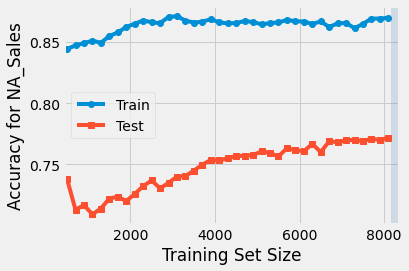

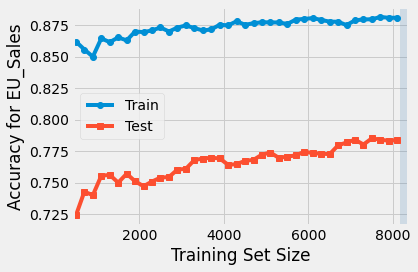

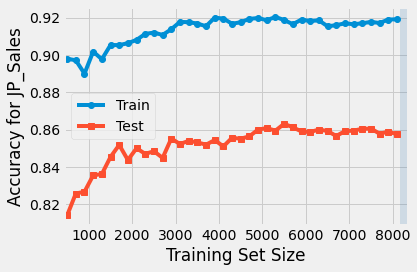

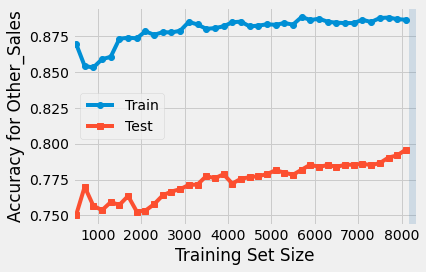

<Figure size 432x288 with 0 Axes>

In [22]:
#K Neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
#Find the KNeighborsClassifier for each target variable (4 sales)
for col in columns:
    clf_2 = KNeighborsClassifier(n_neighbors=3)
    pred_train, pred_test = [], []
    intervals = np.arange(500, X_train2.shape[0] + 1, 200)
    #training and testing the model on the data for each target.Saving the accuracy scores
    for i in intervals:
        clf_2.fit(X_train2[:i], y_train2[col][:i])
        p_train = clf_2.score(X_train2[:i], y_train2[col][:i])     
        p_test = clf_2.score(X_test2[:i], y_test2[col][:i])
        pred_train.append(p_train)
        pred_test.append(p_test)
    #plotting the data size (test and train) vs accuracy scores
    with plt.style.context(('fivethirtyeight')):
        plt.plot(intervals, pred_train, marker='o', label='Train')
        plt.plot(intervals, pred_test, marker='s', label='Test')
        plt.legend(loc='best', numpoints=1)
        plt.xlim([430, X_train2.shape[0]+200])
        plt.axvspan(X_train2.shape[0],
        X_train2.shape[0] + X_test2.shape[0],
        alpha=0.2,
        color='steelblue')
        plt.xlabel('Training Set Size')
        ylabel="Accuracy for " + col
        plt.ylabel(ylabel)
        plt.tight_layout()
        plt.show() 
        plt.clf()

In [ ]:
#K Neighbor classifier
#Accuracy for NA_Sales test and train data
"""As testing and training data size increases, the overall accuracy of the model for test and train data also increases.The
test accuracy is greater than 0.75 and train accuracy is greater than 0.85. Compared to Random Forest and Logistic Regression,
this model has lower accuracy for training data but similiar accuracy for test data. Thus, this model is not good to
predict sales of video games in NA.Using K Means, we are taking year, publisher, platform, and genre to predict if a 
game will make enough sales to be classified successful in NA. Class is true -> Make good sales(successful), false-> make bad 
sales (unsuccessful)"""

#Accuracy for EU_Sales test and train data
"""As testing and training data size increases, the overall accuracy of the model for test and train data also increases.The
test accuracy is around 0.775 and train accuracy is around 0.875. Compared to Random Forest, this model has lower accuracy for 
train data and test data. Compared to Logistic Regression, this model has lower accuracy for test data but higher accuracy for
train data. Thus, this model is not good to predict sales of video games in NA.Using K Means, we are taking year, publisher, 
platform, and genre to predict if a game will make enough sales to be classified successful in EU. Class is true -> Make good 
sales(successful), false-> make bad sales (unsuccessful)"""

#Accuracy for JP_Sales test and train data
"""As testing and training data size increases, the overall accuracy of the model for test and train data also increases.The
test accuracy is around 0.86 and train accuracy is around 0.92. As compared to Random Forest, this model has lower accuracy
for train data but similiar accuracy to test data. As compared to Logistic Regression, this model has higher accuracy for both
test and train data.Thus, this model is not good to predict sales of video games in NA.Using K Means, we are taking year, publisher, 
platform, and genre to predict if a game will make enough sales to be classified successful in EU. Class is true -> Make good 
sales(successful), false-> make bad sales (unsuccessful)"""

#Accuracy for Other_Sales test and train data
"""As testing and training data size increases, the overall accuracy of the model for test and train data also increases.
The test accuracy is greater than 0.775 and train accuracy is greater than 0.875. Compared to Random Forest, this model has 
lower accuracy for train data and test data. Compared to Logistic Regression, this model has higher accuracy for test and train
data.Using K Means, we are taking year, publisher, platform, and genre to predict if a game will make enough sales to be 
classified successful in EU. Class is true -> Make good sales(successful), false-> make bad sales (unsuccessful)"""

In [23]:
#classification
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

X=videoGameData[['Platform', 'Year', 'Genre', 'Publisher']]
y=videoGameData[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]



Average: 76.78%


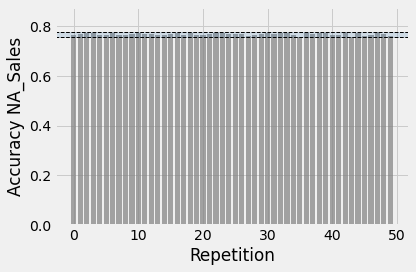

Average: 78.07%


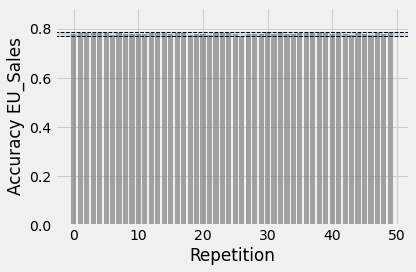

Average: 85.64%


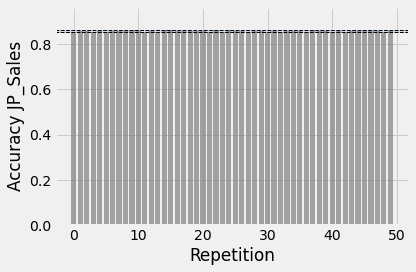

Average: 79.34%


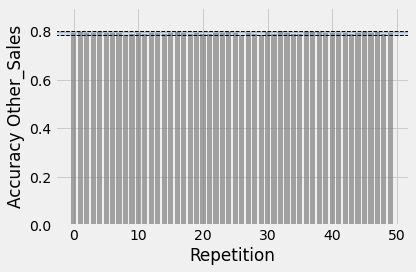

<Figure size 432x288 with 0 Axes>

In [24]:
# K neighbors classifier

columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

rng = np.random.RandomState(seed=12345) 
seeds = np.arange(10**5) 
rng.shuffle(seeds)
seeds = seeds[:50]


for col in columns:
    
    pred_2 = []
    clf_1 = KNeighborsClassifier(n_neighbors=3, weights='uniform',
    algorithm='kd_tree', leaf_size=30,
    p=2, metric='minkowski', metric_params=None, n_jobs=1)
    
    
    for i in seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i, stratify=y)
        y_pred_i = clf_1.fit(X_train, y_train[col]).predict(X_test) 
        y_pred_i_acc = np.mean(y_test[col] == y_pred_i) 
        pred_2.append(y_pred_i_acc)
        
    pred_2 = np.asarray(pred_2)
    print('Average: %.2f%%' % (pred_2.mean()*100))
    


    with plt.style.context(('fivethirtyeight')):
        plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
        plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--') 
        plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--') 
        plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue') 
        plt.ylim([0, pred_2.max() + 0.1])
        plt.xlabel('Repetition')
        plt.ylabel('Accuracy ' + col)
        # plt.ylim([0.5, 1])
        plt.tight_layout()
        #plt.savefig('figures/model-eval-iris_0.svg')
        plt.show()
        plt.clf()
        

Average: 77.38%


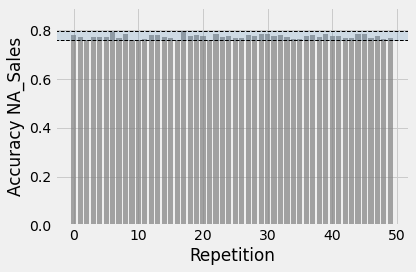

Average: 78.68%


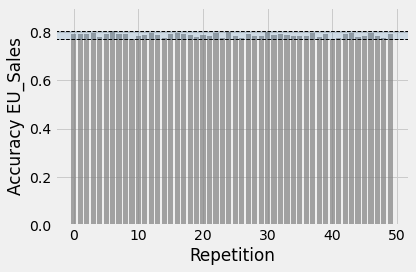

Average: 85.82%


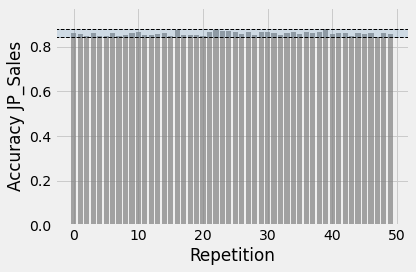

Average: 79.66%


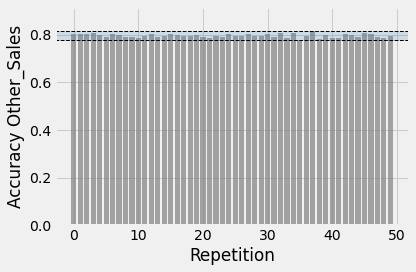

<Figure size 432x288 with 0 Axes>

In [25]:
# ran the above code again, this time using test_size = 0.1 instead of 0.5
# test_size inside the function indicates the percentage of the data 
# that should be held over for testing. 

columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

rng = np.random.RandomState(seed=12345) 
seeds = np.arange(10**5) 
rng.shuffle(seeds)
seeds = seeds[:50]


for col in columns:
    
    pred_2 = []
    clf_1 = KNeighborsClassifier(n_neighbors=3, weights='uniform',
    algorithm='kd_tree', leaf_size=30,
    p=2, metric='minkowski', metric_params=None, n_jobs=1)
    
    
    for i in seeds:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i, stratify=y)
        y_pred_i = clf_1.fit(X_train, y_train[col]).predict(X_test) 
        y_pred_i_acc = np.mean(y_test[col] == y_pred_i) 
        pred_2.append(y_pred_i_acc)
        
    pred_2 = np.asarray(pred_2)
    print('Average: %.2f%%' % (pred_2.mean()*100))
    


    with plt.style.context(('fivethirtyeight')):
        plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
        plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--') 
        plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--') 
        plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue') 
        plt.ylim([0, pred_2.max() + 0.1])
        plt.xlabel('Repetition')
        plt.ylabel('Accuracy ' + col)
        # plt.ylim([0.5, 1])
        plt.tight_layout()
        #plt.savefig('figures/model-eval-iris_0.svg')
        plt.show()
        plt.clf()
        

In [ ]:
#Analysis
# We split the data 50 times for 50 differnet seeds.
# The Accuracy is the percentage of correct predictions for the test data.
# The Accuracy varried with each seed becasue were spliting the data set at a diffrent random states.
# The dotted lines represent the difference between the minimum and maximum accuracies.
# JP_sales has hihgest accuracy,  NA_sales has the lowest accuracy
        
# The Accuracy increased for all sales when we changed the test size from 0.5 to 0.1,
# so we decreased the percentage of the data that should be held over for testing. 
# Having more data to train with correlated with having a more accurate prediction.

In [26]:
#BootStrapping
#Had to resample the dataset since it was messing up.
videoGameData = videoGameDataOriginal.sample(frac = 1)

videoGameData.replace(replace_Platform_comp, inplace=True)

videoGameData.replace(replace_Genre_comp, inplace=True)

videoGameData.replace(replace_Publisher_comp, inplace=True)

videoGameData['Year'] = videoGameData['Year'].astype(int)
videoGameData['Publisher'] = videoGameData['Publisher'].fillna(0).astype(int)

In [27]:
#The functions to get the accuracy of bootstrapping and then plotting the accuracies. 
import math
def getBootstrapAccuracy(idx, X, y, clf):
    accuracies = []
    for i in range(200):
        train_idx = rng.choice(idx, size=idx.shape[0], replace=True)
        test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)

        boot_train_X, boot_train_y = X[train_idx], y[train_idx]
        boot_test_X, boot_test_y = X[test_idx], y[test_idx]

        clf.fit(boot_train_X, boot_train_y)
        acc = clf.score(boot_test_X, boot_test_y)
        accuracies.append(acc)
    return accuracies

def showBootstrapPlot(accuracies, title):
    mean = np.mean(accuracies)

    se = np.sqrt( (1. / (200-1)) * np.sum([(acc - mean)**2 for acc in accuracies]))
    ci = 1.97 * se

    lower = np.percentile(accuracies, 2.5)
    upper = np.percentile(accuracies, 97.5)

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.vlines(mean, [0], 80, lw=2.5, linestyle='-', label='mean')
    ax.vlines(lower, [0], 15, lw=2.5, linestyle='-.', label='CI95 percentile')
    ax.vlines(upper, [0], 15, lw=2.5, linestyle='-.')

    ax.vlines(mean + ci, [0], 15, lw=2.5, linestyle=':', label='CI95 standard')
    ax.vlines(mean - ci, [0], 15, lw=2.5, linestyle=':')

    ax.hist(accuracies, bins=7,
            color='#0080ff', edgecolor="none",
            alpha=0.3)
    plt.legend(loc='upper left')

    plt.xlim([round(min(accuracies), 2)-0.01, round(max(accuracies), 2)+0.01])
    plt.title(title, fontsize=15)
    plt.tight_layout()

    plt.show()

In [28]:
from sklearn.neighbors import KNeighborsClassifier

rng = np.random.RandomState(seed=123)

# videoGameData = videoGameDataOriginal.sample(frac = 1)
X=videoGameData[['Platform', 'Year', 'Genre', 'Publisher']]
y=videoGameData['Global_Sales']
meanOfGlobal_Sales = videoGameData.loc[:,"Other_Sales"].mean(axis=0)
y = np.where(videoGameData['Global_Sales'] >= meanOfGlobal_Sales, True, False)
y_NA = np.where(videoGameData['NA_Sales'] >= meanOfNA_Sales, True, False)
y_EU = np.where(videoGameData['EU_Sales'] >= meanOfEU_Sales, True, False)
y_JP = np.where(videoGameData['JP_Sales'] >= meanOfJP_Sales, True, False)
y_other = np.where(videoGameData['Other_Sales'] >= meanOfOther_Sales, True, False)

X = X.to_numpy()

clf = KNeighborsClassifier(n_neighbors=5,
                            weights='uniform',
                            algorithm='kd_tree',
                            leaf_size=30,
                            p=2,
                            metric='minkowski',
                            metric_params=None,
                            n_jobs=1)

idx = np.arange(y.shape[0])

accuracies = getBootstrapAccuracy(idx, X, y, clf)
accuracies_NA = getBootstrapAccuracy(idx, X, y_NA, clf)
accuracies_EU = getBootstrapAccuracy(idx, X, y_EU, clf)
accuracies_JP = getBootstrapAccuracy(idx, X, y_JP, clf)
accuracies_other = getBootstrapAccuracy(idx, X, y_other, clf)

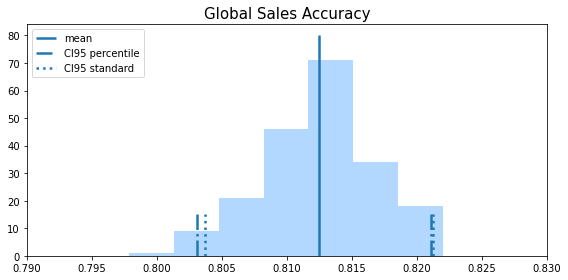

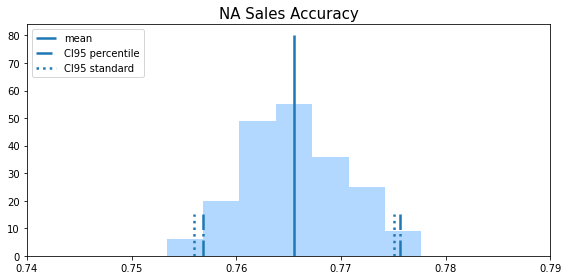

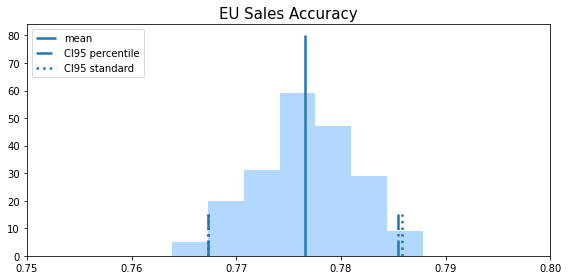

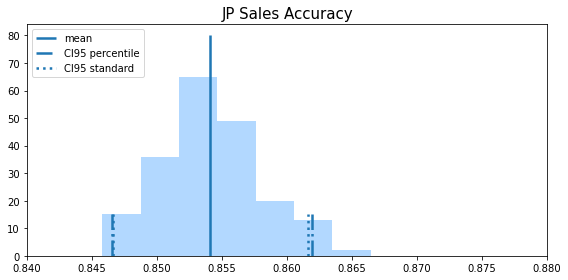

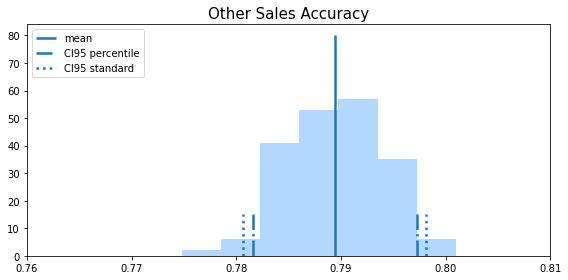

In [29]:
showBootstrapPlot(accuracies, "Global Sales Accuracy")
showBootstrapPlot(accuracies_NA, "NA Sales Accuracy")
showBootstrapPlot(accuracies_EU, "EU Sales Accuracy")
showBootstrapPlot(accuracies_JP, "JP Sales Accuracy")
showBootstrapPlot(accuracies_other, "Other Sales Accuracy")

In [ ]:
#Analysis of Bootstrapping Accuracy
#Based off of all the Sales Accuracy graphs, they have a normal distribution and the average accuracy for all the sales is about
#81.2%. This number is from the average accuracy of Gloabl Sales since Global Sales is the sum of all the other labels. From 
#this we see that the predictors do a decent job at predicting/classifying whether a game would have good sales or not. 

#Japan's sales accuracy is the highest with about 85.5% accuracy, suggesting that the game platform, year, genre, and 
#publisher are best at being able to predict/classify whether the Japanese sales will be good or not. This suggests that the
#Japanese are more consistent in what games they prefer to buy compared to the other regions. 

#The region with the lowest accuracy is North America or NA with an average accuracy of 76.4%. This suggests that NA has less of
#a pattern when it comes to classifying/predicting whether the sales would be good or not. 

#The European region or EU and the other miscellaneous regions have a slightly higher mean accuracy at 77.7% and 78.9% 
#respectively. While this is only slightly better than the average accuracy for NA sales, it still shows that the EU sales and 
#other sales have better consistency at classifying/predicting whether the sales would be good. 